In [38]:
!pip install tensorflow opencv-python matplotlib

In [39]:
!pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.10.post3
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
aiosqlite                                0.22.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.2
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                        

In [40]:
import tensorflow as tf
import os

In [41]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.19.0
Num GPUs Available: 0


In [42]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# kitne GPUs hai available Detect krna
# memory ko allocate karna during training

In [43]:
tf.config.list_physical_devices('GPU')


[]

In [44]:
import cv2
import imghdr # batata hai type of img file

In [45]:
data_dir = '/content/data'

In [46]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [47]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


#check krna ki Img file is correct or not and delete krna if found incorrect


In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [49]:
data = tf.keras.utils.image_dataset_from_directory('data')

# saari images ko read krra h under data , unke labels assign krta h & batches mea divide krta h of 32

Found 305 files belonging to 2 classes.


In [50]:
data_iterator = data.as_numpy_iterator()

#convert krta h data ko numpystyle iterator mea jo enable us to loop through it

In [51]:
batch = data_iterator.next()

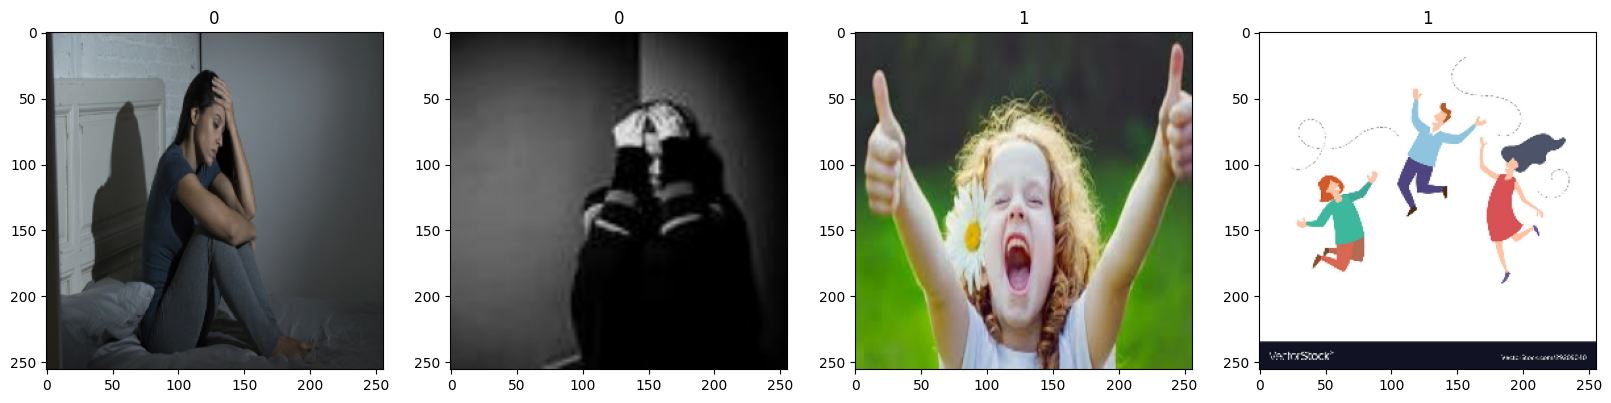

In [52]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

# plot krta hai first 4 img along with assigned labels

In [53]:
data = data.map(lambda x, y: (x/255, y))


#normalize krna image pixel ko in range (0,1)

In [54]:
data.as_numpy_iterator().next()

(array([[[[0.74686736, 0.5920879 , 0.44466147],
          [0.7543888 , 0.602742  , 0.44980085],
          [0.75281096, 0.6033088 , 0.45958945],
          ...,
          [0.4456112 , 0.3723269 , 0.3266161 ],
          [0.42205116, 0.35146293, 0.3044041 ],
          [0.43053767, 0.35994944, 0.32073376]],
 
         [[0.7269148 , 0.57397366, 0.41708028],
          [0.74742645, 0.5944853 , 0.44154412],
          [0.751371  , 0.6023514 , 0.45230547],
          ...,
          [0.43426776, 0.36367953, 0.3229473 ],
          [0.43594515, 0.36335018, 0.33015472],
          [0.42818627, 0.35458794, 0.32440257]],
 
         [[0.72389704, 0.5709559 , 0.4180147 ],
          [0.7378906 , 0.58494943, 0.42465532],
          [0.7214308 , 0.5724112 , 0.42731312],
          ...,
          [0.44534314, 0.3747549 , 0.32801777],
          [0.43822762, 0.3676394 , 0.32058057],
          [0.43585324, 0.365265  , 0.32581955]],
 
         ...,
 
         [[0.81396294, 0.7978018 , 0.78039217],
          [0.82384

In [55]:
len(data)

10

In [59]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

#assign krna train test val splits 70% 10% 20%

In [60]:
test_size

1

In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(train), len(val), len(test)

(7, 2, 1)

In [62]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

train = train.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


#Sequential model ki API ko import krna fir import krna layer classes for nueral network

In [106]:
model = tf.keras.Sequential([
    data_augmentation,
    Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')


])


In [107]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

#adam optimize ko use kiye h for weightes updating

In [108]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
logdir= 'logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

#help krta h monitor krne mea training val ka loss/acc

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


#store krta h training history in hist for analysis and plotting

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5375 - loss: 0.9584 - val_accuracy: 0.4375 - val_loss: 0.7097
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5597 - loss: 0.6620 - val_accuracy: 0.7188 - val_loss: 0.6063
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6496 - loss: 0.6656 - val_accuracy: 0.7344 - val_loss: 0.5943
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.7098 - loss: 0.5979 - val_accuracy: 0.6250 - val_loss: 0.7059
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6498 - loss: 0.6260 - val_accuracy: 0.7656 - val_loss: 0.5441
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6995 - loss: 0.5722 - val_accuracy: 0.7500 - val_loss: 0.5308
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.7113 - loss: 0.5186 - val_accuracy: 0.8281 - val_loss: 0.4184
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7248 - loss: 0.5232 - val_accuracy: 0.7656 - val_loss: 0.5481
Epoch 9/

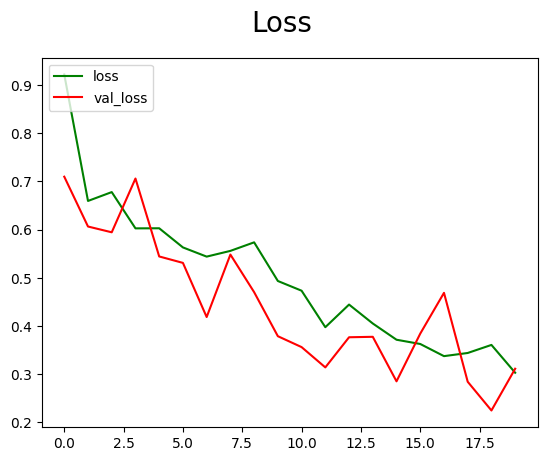

In [113]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

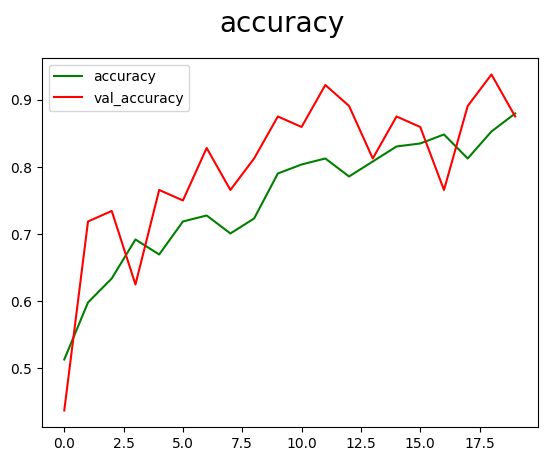

In [114]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [115]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# import krna diff metrices for evaluation

In [116]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [118]:
for X, y in test.as_numpy_iterator():
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(
  f'Precision: {pre.result().numpy()}, '
  f'Recall: {re.result().numpy()}, '
  f'Accuracy: {acc.result().numpy()}'
)


#calc krna different metrices on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Precision: 0.8333333134651184, Recall: 1.0, Accuracy: 0.8823529481887817


In [119]:
import cv2


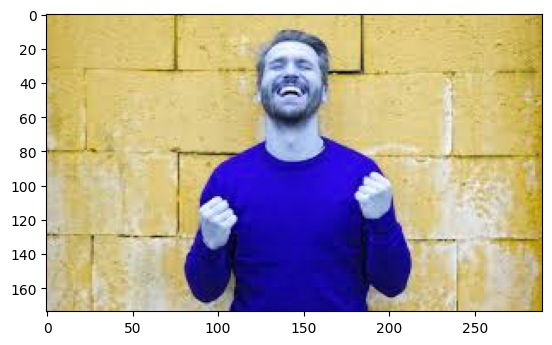

In [130]:
img = cv2.imread('/content/download.jpeg')
plt.imshow(img)
plt.show()

#new img data ko plot krra h

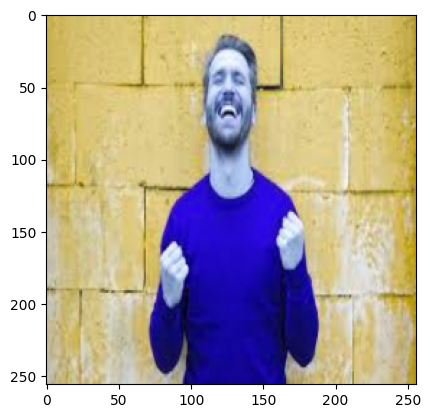

In [131]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


# resize krna new img ko acc to our model

In [132]:
yhat = model.predict(np.expand_dims(resize/255, 0))

#scale krna new img ko for testing so that it could be in range 0-1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [133]:
yhat

array([[0.9984978]], dtype=float32)

In [134]:
if yhat > 0.5:
    print(f'Predicted Happy')
else:
    print(f'Predicted Sad')

Predicted Happy


In [135]:
from tensorflow.keras.models import load_model


In [102]:
model.save(os.path.join('models','imageclassifier.h5'))
